## Predicting Zomato cost using Random forest Regression

In [154]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [155]:
dataset=pd.read_csv('zomatocleaned.csv')

In [156]:
dataset.head()

,Unnamed: 0,name,online_order,book_table,rating,votes,location,rest_type,dish_liked,cuisines,approx_cost,type
0,0,Jalsa,Yes,Yes,4.1,775,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800,Buffet
1,1,Spice Elephant,Yes,No,4.1,787,Banashankari,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800,Buffet
2,2,San Churro Cafe,Yes,No,3.8,918,Banashankari,"Cafe, Casual Dining","Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",800,Buffet
3,3,Addhuri Udupi Bhojana,No,No,3.7,88,Banashankari,Quick Bites,Masala Dosa,"South Indian, North Indian",300,Buffet
4,4,Grand Village,No,No,3.8,166,Basavanagudi,Casual Dining,"Panipuri, Gol Gappe","North Indian, Rajasthani",600,Buffet


In [157]:
dataset.tail()

,Unnamed: 0,name,online_order,book_table,rating,votes,location,rest_type,dish_liked,cuisines,approx_cost,type
30331,56244,The Farm House Bar n Grill,No,No,3.7,34,Whitefield,"Casual Dining, Bar",NaN,"North Indian, Continental",800,Pubs and bars
30332,56246,Bhagini,No,No,2.5,81,Whitefield,"Casual Dining, Bar","Biryani, Andhra Meal","Andhra, South Indian, Chinese, North Indian",800,Pubs and bars
30333,56247,Best Brews - Four Points by Sheraton Bengaluru...,No,No,3.6,27,Whitefield,Bar,NaN,Continental,"1,500",Pubs and bars
30334,56250,Chime - Sheraton Grand Bengaluru Whitefield Ho...,No,Yes,4.3,236,"ITPL Main Road, Whitefield",Bar,"Cocktails, Pizza, Buttermilk",Finger Food,"2,500",Pubs and bars
30335,56251,The Nest - The Den Bengaluru,No,No,3.4,13,"ITPL Main Road, Whitefield","Bar, Casual Dining",NaN,"Finger Food, North Indian, Continental","1,500",Pubs and bars


In [158]:
dataset.isnull().sum()

Unnamed: 0          0
name                0
online_order        0
book_table          0
rating              0
votes               0
location            0
rest_type         107
dish_liked      13213
cuisines            6
approx_cost         0
type             2584
dtype: int64

In [159]:
dataset.fillna('',inplace=True)

In [160]:
dataset.isnull().sum()

Unnamed: 0      0
name            0
online_order    0
book_table      0
rating          0
votes           0
location        0
rest_type       0
dish_liked      0
cuisines        0
approx_cost     0
type            0
dtype: int64

In [161]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30336 entries, 0 to 30335
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Unnamed: 0    30336 non-null  int64  
 1   name          30336 non-null  object 
 2   online_order  30336 non-null  object 
 3   book_table    30336 non-null  object 
 4   rating        30336 non-null  float64
 5   votes         30336 non-null  int64  
 6   location      30336 non-null  object 
 7   rest_type     30336 non-null  object 
 8   dish_liked    30336 non-null  object 
 9   cuisines      30336 non-null  object 
 10  approx_cost   30336 non-null  object 
 11  type          30336 non-null  object 
dtypes: float64(1), int64(2), object(9)
memory usage: 2.8+ MB


In [162]:
dataset.describe()

,Unnamed: 0,rating,votes
count,30336.000000,30336.000000,30336.000000
mean,26538.803435,3.549364,352.687994
std,17168.088370,0.879905,865.065354
min,0.000000,0.000000,0.000000
25%,10576.500000,3.400000,19.000000
50%,25595.000000,3.700000,74.000000
75%,42797.250000,4.000000,291.000000
max,56251.000000,4.900000,16832.000000


In [163]:
sns.set()

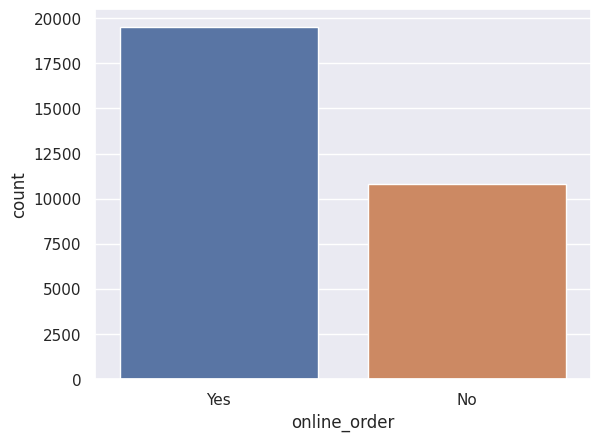

In [164]:
sns.countplot(x='online_order',data=dataset)
plt.show()

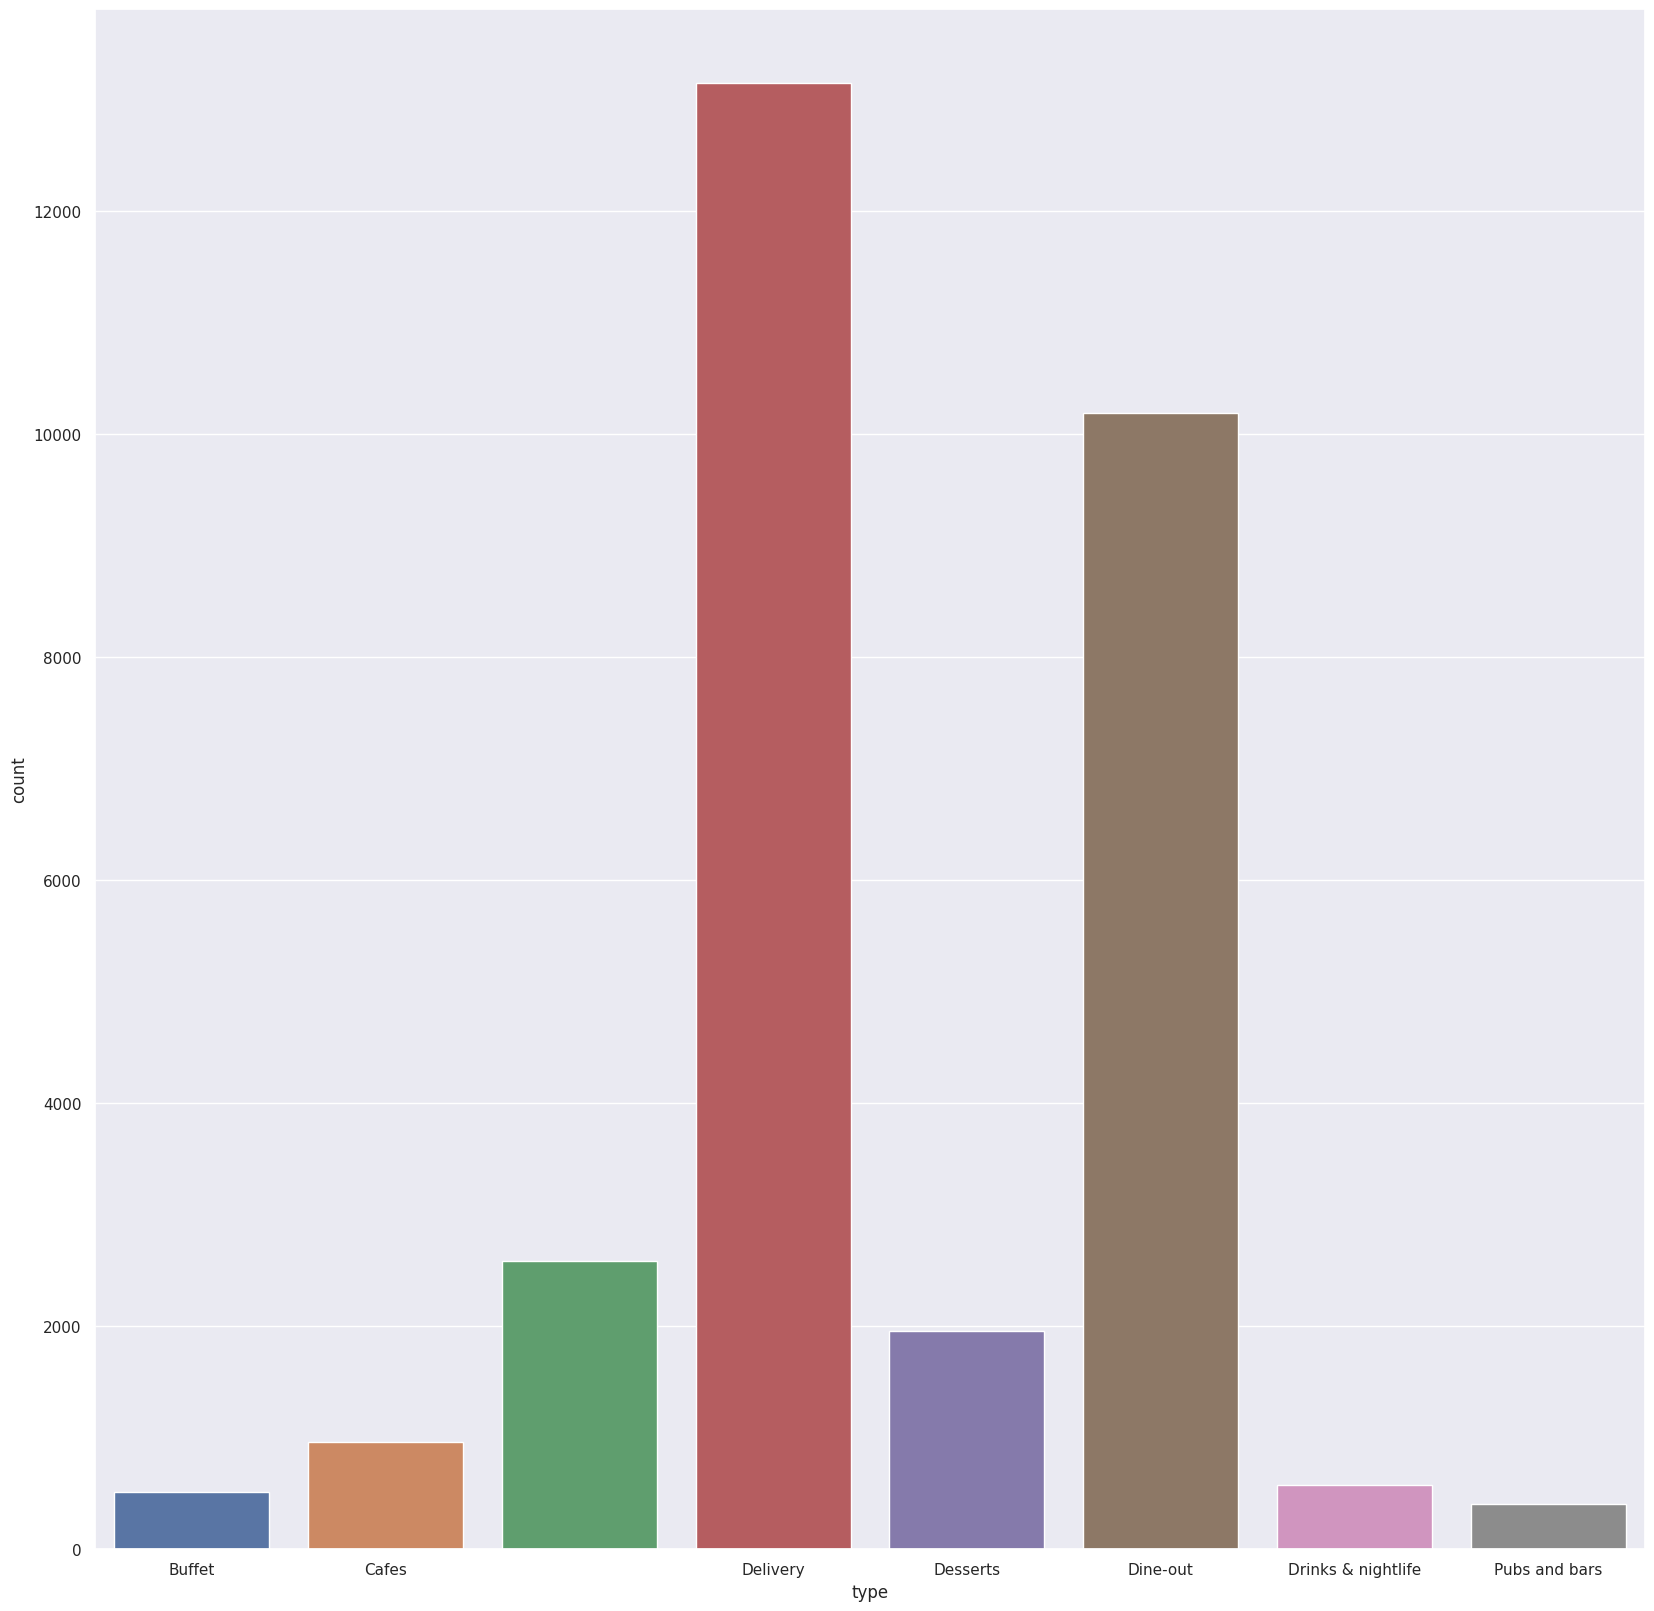

In [188]:
plt.figure(figsize=(20,20))
sns.countplot(x='type',data=dataset)
plt.show()

In [166]:
combined_features=dataset['location']+' '+dataset['rest_type']+' '+dataset['dish_liked']+' '+dataset['cuisines']+' '+ dataset['type']+' '+dataset['online_order']+' '+dataset['book_table']

In [167]:
print(combined_features)

0        Banashankari Casual Dining Pasta, Lunch Buffet...
1        Banashankari Casual Dining Momos, Lunch Buffet...
2        Banashankari Cafe, Casual Dining Churros, Cann...
3        Banashankari Quick Bites Masala Dosa South Ind...
4        Basavanagudi Casual Dining Panipuri, Gol Gappe...
                               ...                        
30331    Whitefield Casual Dining, Bar  North Indian, C...
30332    Whitefield Casual Dining, Bar Biryani, Andhra ...
30333      Whitefield Bar  Continental Pubs and bars No No
30334    ITPL Main Road, Whitefield Bar Cocktails, Pizz...
30335    ITPL Main Road, Whitefield Bar, Casual Dining ...
Length: 30336, dtype: object


In [168]:
dataset['approx_cost']=dataset['approx_cost'].str.replace(",","")

In [169]:
print(dataset['approx_cost'])

0         800
1         800
2         800
3         300
4         600
         ... 
30331     800
30332     800
30333    1500
30334    2500
30335    1500
Name: approx_cost, Length: 30336, dtype: object


In [170]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer=TfidfVectorizer()
feature_extracted=vectorizer.fit_transform(combined_features)


In [171]:
print(feature_extracted)

  (0, 1568)	0.114243533845267
  (0, 294)	0.09218815005470504
  (0, 965)	0.1840215515086939
  (0, 643)	0.07284118410522541
  (0, 1006)	0.07911484920262286
  (0, 1366)	0.18172247867018482
  (0, 346)	0.2230300966570826
  (0, 1418)	0.19882665693587764
  (0, 163)	0.10977976461457796
  (0, 462)	0.23362091340909139
  (0, 1331)	0.323282358511688
  (0, 1483)	0.2673365229552753
  (0, 791)	0.3766946417177534
  (0, 1050)	0.16254532721256193
  (0, 1059)	0.2818465131020008
  (0, 885)	0.1596287434803775
  (0, 218)	0.3921363392623232
  (0, 826)	0.23710594123663734
  (0, 1074)	0.1427293327584017
  (0, 431)	0.09251741884528093
  (0, 259)	0.09395408855030522
  (0, 86)	0.21708387656482878
  (1, 1001)	0.046718023902691724
  (1, 290)	0.10572723009737259
  (1, 1473)	0.18249130222508372
  :	:
  (30334, 513)	0.2685607824178034
  (30334, 327)	0.21521667016924215
  (30334, 97)	0.2285509747577478
  (30334, 231)	0.32440006146632533
  (30334, 526)	0.13493442031317002
  (30334, 1232)	0.15699809830052713
  (30334, 11

In [172]:
feature_extracted.shape

(30336, 1578)

In [173]:
dataset.shape

(30336, 12)

In [174]:
x=feature_extracted
y=dataset['approx_cost'].values

In [175]:
print(x)

  (0, 1568)	0.114243533845267
  (0, 294)	0.09218815005470504
  (0, 965)	0.1840215515086939
  (0, 643)	0.07284118410522541
  (0, 1006)	0.07911484920262286
  (0, 1366)	0.18172247867018482
  (0, 346)	0.2230300966570826
  (0, 1418)	0.19882665693587764
  (0, 163)	0.10977976461457796
  (0, 462)	0.23362091340909139
  (0, 1331)	0.323282358511688
  (0, 1483)	0.2673365229552753
  (0, 791)	0.3766946417177534
  (0, 1050)	0.16254532721256193
  (0, 1059)	0.2818465131020008
  (0, 885)	0.1596287434803775
  (0, 218)	0.3921363392623232
  (0, 826)	0.23710594123663734
  (0, 1074)	0.1427293327584017
  (0, 431)	0.09251741884528093
  (0, 259)	0.09395408855030522
  (0, 86)	0.21708387656482878
  (1, 1001)	0.046718023902691724
  (1, 290)	0.10572723009737259
  (1, 1473)	0.18249130222508372
  :	:
  (30334, 513)	0.2685607824178034
  (30334, 327)	0.21521667016924215
  (30334, 97)	0.2285509747577478
  (30334, 231)	0.32440006146632533
  (30334, 526)	0.13493442031317002
  (30334, 1232)	0.15699809830052713
  (30334, 11

In [176]:
print(y)

['800' '800' '800' ... '1500' '2500' '1500']


In [177]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)


In [178]:
from sklearn.ensemble import RandomForestRegressor
regressor=RandomForestRegressor(n_estimators=10)
regressor.fit(x_train,y_train)
y_pred=regressor.predict(x_test)

In [179]:
print(y_pred)

[ 650.         2710.          375.         ...  463.5         226.875
  160.16666667]


In [180]:
from sklearn.metrics import r2_score
print(r2_score(y_test,y_pred))

0.9475123077892537
